# **Lab 3 (b)**
### Weightage 3.6%
# Convolutional Neural Networks
---
Dataset used: Cats Vs. Dogs

---



Maximum Points in the Lab: 90

---
Important points to remember :


1.  Observations for the experiments should be explained.
2. All the code should be submitted in the form of a single Jupyter notebook itself.
3. Points for each sub-section are mentioned in the appropriate question.
4. Make sure to begin early as a few experiments may consume more time to run.
5. You can use Google colab to run in jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the python notebook.
7. **Code Readability** is very important. Hence use self explanatory variable names and add comments to describe your approach wherever necessary.
8. You are expected to submit your **detailed inferences** and not just an error free code.
9. The lab is due on **March 20th 11.59pm**.
10. The lab should be completed **individually**. Students are expected to follow the **honor code** of the class.




In this part of your Lab 3, you will be using Convolutional Neural Network to classify whether a given image contains a Cat or a Dog. You can use the tensorflow package for this implementation. The Cats and Dogs dataset from the famous Kaggle contest which is filtered and available at tensorflow can be used.

In [1]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 48kB/s 
     |████████████████████████████████| 450kB 54.8MB/s 
     |████████████████████████████████| 3.8MB 42.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=1e7f8e881d49f7e793953f088e7998010357f894a8864704465a0cf51a130492
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc1 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc1 has requirement tensorboard<2.2.0,>=2.1.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.2.0rc1 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0rc0


In [0]:
# Import the necessary libraries

import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import shutil
import random
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

# If using Google Colab, use the following package to display the image
# If running on your local system, cv2.imshow shall work fine
# If running on your local system please comment the line below
from google.colab.patches import cv2_imshow

# Data loading and Preprocessing

---


The following blocks downloads the dataset stored at tensorflow and extracts them to be used to train the CNN model. **Please don't make any changes to these blocks below.**

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract = True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 0s 0us/step


The dataset has the following directory structure:

<pre>
<b>cats_and_dogs_filtered</b>
|__ <b>train</b>
    |______ <b>cats</b>: [cat.0.jpg, cat.1.jpg, cat.2.jpg ....]
    |______ <b>dogs</b>: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ <b>validation</b>
    |______ <b>cats</b>: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ....]
    |______ <b>dogs</b>: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]
</pre>

Extract the paths of these directories onto different variables to facilitate accessing the dataset and thereby training the model.

In [0]:
train_dir_path = os.path.join(PATH, 'train')
validation_dir_path = os.path.join(PATH, 'validation')

train_cats_dir_path = os.path.join(train_dir_path, 'cats')  
train_dogs_dir_path = os.path.join(train_dir_path, 'dogs') 
validation_cats_dir_path = os.path.join(validation_dir_path, 'cats')  
validation_dogs_dir_path = os.path.join(validation_dir_path, 'dogs')  

## Create a labelled test set from the validation set
As you would have seen we have only training and validation sets with labels as the ground truth labels for the Kaggle contest test set images is not public. Hence we shall consider 10% of validation data (5% Cats, 5% Dogs)  as our test set. 


In [0]:
# Create a test directory with the same Cats and Dogs sub directory structure 
test_dir_path = os.path.join(PATH, 'labelled_test')
if not  os.path.exists(test_dir_path):
    os.makedirs(test_dir_path)
test_cats_dir_path = os.path.join(test_dir_path,'cats')
test_dogs_dir_path = os.path.join(test_dir_path,'dogs')
if not os.path.exists(test_cats_dir_path):
    os.makedirs(test_cats_dir_path)
if not os.path.exists(test_dogs_dir_path):
    os.makedirs(test_dogs_dir_path)

# Randomly pick 5% of validation Cat Images 
val_cat_list = os.listdir(validation_cats_dir_path)
num_cat_test_files = int(0.05 * len(val_cat_list))
chosen_cats = random.sample(val_cat_list,num_cat_test_files)

# Randomly pick 5% of validation Dog Images 
val_dog_list = os.listdir(validation_dogs_dir_path)
num_dog_test_files = int(0.05 * len(val_dog_list))
chosen_dogs = random.sample(val_dog_list,num_dog_test_files)

# Move the selected Cat Images from Validation Cats directory to Test Cats directory 
for cat in chosen_cats:
    src_path = os.path.join(validation_cats_dir_path,cat)
    if not os.path.exists(os.path.join(test_cats_dir_path,cat)):
        shutil.move(src_path,test_cats_dir_path)

# Move the selected Dog Images from Validation Dogs directory to Test Dogs directory 
for dog in chosen_dogs:
    src_path = os.path.join(validation_dogs_dir_path,dog)
    if not os.path.exists(os.path.join(test_dogs_dir_path,dog)):
        shutil.move(src_path,test_dogs_dir_path)  


In [0]:
num_cats_train =  len(os.listdir(train_cats_dir_path))
num_dogs_train =  len(os.listdir(train_dogs_dir_path))
num_cats_val =  len(os.listdir(validation_cats_dir_path))
num_dogs_val =  len(os.listdir(validation_dogs_dir_path))
num_cats_test =  len(os.listdir(test_cats_dir_path))
num_dogs_test =  len(os.listdir(test_dogs_dir_path))

total_train_data = num_cats_train + num_dogs_train
total_val_data = num_cats_val + num_dogs_val
total_test_data = num_cats_test + num_dogs_test

The images are of different sizes, but our machine learning model requires input images to be of a fixed size. Let us decide an input size 200 x 200.

In [0]:
IMG_HEIGHT = 200
IMG_WIDTH = 200

# Generate Image Batches


---


As images are high dimensional, fitting the model on entire training set may be memory and computation inefficient. Hence we generate batches of images to be processed by the model. `ImageDataGenerator` class in tensorflow facilitates this. 

Describe the various arguments in the instantiation of `tensorflow.keras.preprocessing.image.ImageDataGenerator` object.


---

**5 Points**

---

###`tensorflow.keras.preprocessing.image.ImageDataGenerator`
 Order is same as in the docs.

1) **featurewise_center** : Boolean\
Makes the mean of input dataset 0 featurewise.

2) **samplewise_center** : Boolean\
Makes the mean of input 0 samplewise.

3) **featurewise_std_normalization** : Boolean\
Normalize dataset by dividing input by standard deviation of the dataset, feature-wise.

4) **samplewise_std_normalization** : Boolean\
Normalize dataset by dividing input by standard deviation of the dataset, feature-wise.

5) **zca_epsilon** : Float\
Defines epsilon for ZCA whitening.

6) **zca_whitening** : Boolean\
Apply ZCA whitening.

7) **rotation_range** : Int\
Range for random rotations to be applied in degrees .

8) **width_shift_range** : Float, int, 1-D array-like\
Defines the range of width to be shifted.

9) **height_shift_range** : Float, int, 1-D array-like\
Defines the range of height to be shifted.\

10) **brightness_range** : Tuple or list of floats\
Defines range for brightness to be shifted.

11) **shear_range** : Float\
Shear angle in counter-clockwise direction in degrees

12) **zoom_range** : Float or list of two floats\
Range for random zoom.\
For list of 2 floats, we can define the upper and lower limits.

13) **channel_shift_range** : Float\
Range for random channel shifts.

14) **fill_mode** :  One of {"constant", "nearest", "reflect" or "wrap"}\
Defines how to fill points outside the boundaries of the input.

14) **cval** : Float or int\
Value used when fill_mode = "constant".

15) **horizontal_flip** : Boolean\
Randomly flip inputs horizontally.

16) **vertical_flip** : Boolean\
Randomly flip inputs vertically.

17) **rescale** : Float or int\
Defines rescaling factor.

18) **preprocessing_function** : \
Function that will be applied to each input. Input to function must be image (numpy array of shape h*w*c) and it must return same shape numpy array.

19) **data_format** : "channels_first" or "channels_last"\
Defines the format of the image data.

20) **validation_split** : Float\
Defines the fraction of images reserved for validation.

21) **dtype** : valid np.dtype\
Defines the dtype to be used for generated numpy arrays to store image data.


Describe the arguments of `flow_from_directory()` method of the `tensorflow.keras.preprocessing.image.ImageDataGenerator` object. 

---

**5 Points**

---

### `flow_from_directory()` 

1) **directory** : String\
Defines the path to input image data directory.

2) **target_size** : Tuple of integers (height, width)\
Defines the dimensions to which all input images will be resized. Default is (256, 256). 

3) **color_mode** : one of {"grayscale", "rgb", "rgba"}\
Defines the color mode (number of channels) of the images. Deafult is "rgb".

3) **classes** : list of strings\
Defines the list of class subdirectories. Default is None, where classes are automatcally inferred from subdirectory structure.

4) **class_mode** : One of {"categorical", "binary", "sparse", "input"} or None\
Defines the type of label arrays that are returned. Default is "categorical".\

5) **batch_size** : Int\
Defines the batch size. Default is 32.

6) **shuffle** : Boolean\
Defines whether to shuffle the data or not. Default is True. If set to False, sorts the data in alphanumeric order.

7) **seed** : Int\
Defines the seed value to be used for random shuffling and transformation.

8) **save_to_dir** : None or String\
Defines the directory to save augmented images generated.

9) **save_prefix** : String\
Defines the prefix to be used for filenames for saving pictures.

10) **save_format** : One of {'png', 'jpeg'}\
Defines the format to save images in. Default is 'png'.

11) **follow_links** : Boolean\
Defines Whether to follow symlinks inside class subdirectories. Deafult is False.

12) **subset** : "training" or "validation"\
Subset of the input image data.

13) **interpolation** : One of {'nearest', 'bilinear', 'bicubic', 'lanczos', 'box', 'hamming'}\
Defines the interpolation method to be used if target image size is different from loaded image.

Create a function that returns a generator object which shall fetch batches of images from the specified directory. This function shall be reused for fetching images from train, validation or test directories.



---

**5 Points**


---




In [0]:
def get_generator(directory_path, batch_size_):
    # Insert your code here

    data_generator = ImageDataGenerator(rescale=1./255.)
    data_batch_generator = data_generator.flow_from_directory(directory_path, batch_size=batch_size_,target_size=(IMG_HEIGHT,IMG_WIDTH),class_mode='binary')

    return data_batch_generator

Describe the arguments for the following functions callable on a `tensorflow.keras.Sequential` model object :

1. add() **[5 Points]**

> **layer**:\
  A layer object instance to be appended to current sequential structure.

2. compile() **[5 Points]**

> 1) **optimizer** : String or tf.keras.optimizers instance \
Defines the optimizer to be used. \
 \
2) **loss** : String, objective function or tf.keras.losses.Loss instance \
Defines the loss function to be used. \
 \
3) **metrics** : List of strings(metrics) \
List of metrics to be evaluated by the model during training and testing.\
 \
4) **loss_weights** :  List or dictionary of floats\
List or dictionary specifying scalar coefficients to weight the loss contributions of different model outputs. \
 \
5) **sample_weight_mode** : None or "temporal" \
Defines the timestep-wise sample weighting in case of 2D weights. \
 \
6) **weighted_metrics** : List of strings(metrics) \
List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.\
 \
7) **target_tensors** : tensor, a list of tensors, or a dictionary\
Defines the external tensors to be used instead of default placeholders.\
 \
8) **\*\*kwargs** : \
Any additional arguments.

3. fit() **[5 Points]**

> 1) **x** :\
Input data. \
 \
2) **y** : \
Target data. \
 \
3) **batch_size** : Int \
Defines the batch size to be used.Default is 32.\
 \
4) **epochs** :  Int\
Defines the number of epochs(iterations).\
 \
5) **verbosity** : 0,1 or 2 \
If 0, silent else if 1, progress bar and if 2, one line per epoch. \
 \
6) **callbacks** : List of keras.callbacks.Callback instances \
Defines the list of callbacks to be applied during training.\
 \
7) **validation_split** : Float \
Defines the fraction of images reserved for validation.placeholders.\
 \
8) **validation_data** :  \
Validation data for model evaluation.\
 \
9) **shuffle** : Boolean \
Defines whether to shuffle the data or not. Default is True. If set to False, sorts the data in alphanumeric order. \
 \
10) **class_weight** :  dictionary { Int : Float }\
Defines the dictionary mapping class indices to a weight value, used for weighting the loss function.\
 \
11) **sample_weight** : Numpy array \
Defines the weights for the training samples, used for weighting the loss function (during training).\
\
12) **initial_epoch** : Int\
Defines the epoch at which to start training\
 \
13) **steps_per_epoch** : Int or None\
Defines the total steps(batches) to use in one complete epoch.\
 \
14) **validation_steps** : Int or None\
Defines the total steps(batches) to use in one complete traversal of validation data. Deafult is None, draw samples until validation set is not exhausted.\
 \
15) **validation_freq** : Int or collections_abc.Container instance\
If integer, defines how many training epochs to run before a new validation run is performed, else if container defines the epooch number directly.\
\
16) **max_queue_size** : Int\
Defines the maximum size for the generator queue.\
 \
17) **worker** : Int \
Defines the maximum number of processes to spin up when using process-based threading. \
 \
18) **use_multiprocessing** : Boolean\
Defines whether to use process based multi-threading.\
 \
19) **\*\*kwargs** : \
Any additional arguments.


4. predict()  **[5 Points]**

> 1) **x** :\
Input data. \
 \
2) **batch_size** : Int \
Defines the batch size to be used.Default is 32.\
 \
3) **verbosity** : 0,1 or 2 \
If 0, silent else if 1, progress bar and if 2, one line per epoch. \
 \
4) **steps** : Int \
Defines the total steps (batches) to be taken before declaring the prediction round finished.\
\
5) **callbacks** : List of keras.callbacks.Callback instances \
Defines the list of callbacks to be applied during training.\
 \
6) **max_queue_size** : Int\
Defines the maximum size for the generator queue.  \
 \
7) **worker** : Int \
Defines the maximum number of processes to spin up when using process-based threading.\
 \
8) **use_multiprocessing** : Boolean\
Defines whether to use process based multi-threading.\
 \


Describe the arguments used when instantiating the following `tensorflow.keras.layers` :
1. Conv2D() **[5 Points]**

> 1) **filters**: Int \
Defines the dimensionality of output space.\
\
2) **kernel_size**: Int or tuple/list of two integers\
Defines the height and width of the 2D convolution window. If single integer provided, the square convolution window of specified length is used.\
\
3) **strides**: Int or tuple/list of two integers \
Defines the the strides of the convolution along the height and width.If single integer provided, same stride is used along both dimension. \
\
4) **padding**: One of {"valid", "same"} \
Defines the padding method to be used. Default is "valid".\
\
5) **data_format**: "channels_first" or "channels_last" \
Defines the format(position of channels) of the input data. \
\
6) **dilation_rate**: Int or tuple/list of two integers\
Defines the dilation rate to use for dilated convolution\
\
7) **activation**: Int or tuple/list of two integers \
Defines the activation functions to be used.\
\
8) **use_bias**: Boolean \
Defines whether to use bias vector.Default is True\.
\
9) **kernel_initializer**: \
Initializer for the kernel weights matrix.\
\
10) **bias_initializer**: \
Initializer for the bias vector.\
\
11) **kernel_regularizer**: \
Regularizer function applied to the kernel weights matrix.\
\
12) **bias_regularizer**: \
Regularizer function applied to the bias vector.\
\
13) **activity_regularizer**: \
Regularizer function applied to the output of the layer \
\
14) **kernel_constraint**: \
Constraint function applied to the kernel matrix.\
\
15) **bias_constraint**: \
Constraint function applied to the kernel matrix.\

2. MaxPooling2D() **[5 Points]**

> 1) **pool_size**: integer or tuple of 2 integers\
Defines the factors by which to downscale (vertical, horizontal). \
\
2) **strides**: integer or tuple of 2 integers\
Defines the stride along both dimensions.\
\
c) **padding**: One of {"valid", "same"} \
Defines the padding method to be used. \
\
d) **data_format**: "channels_first" or "channels_last" \
Defines the format(position of channels) of the input data. \

3. Flatten()  **[5 Points]**

> 1) **data_format**: "channels_first" or "channels_last" \
Defines the format(position of channels) of the input data. \

4. Dense()  **[5 Points]**

> 1) **units**: Int \
Defines the dimensionality of output space.\
\
2) **activation**: Int or tuple/list of two integers \
Defines the activation functions to be used.\
\
3) **use_bias**: Boolean \
Defines whether to use bias vector.Default is True\.
\
4) **kernel_initializer**: \
Initializer for the kernel weights matrix.\
\
5) **bias_initializer**: \
Initializer for the bias vector.\
\
6) **kernel_regularizer**: \
Regularizer function applied to the kernel weights matrix.\
\
7) **bias_regularizer**: \
Regularizer function applied to the bias vector.\
\
8) **activity_regularizer**: \
Regularizer function applied to the output of the layer \
\
9) **kernel_constraint**: \
Constraint function applied to the kernel matrix.\
\
10) **bias_constraint**: \
Constraint function applied to the kernel matrix.\

5. Dropout() **[5 Points]**

> 1) **rate**: Float between 0 and 1\
Defines the fraction of the input units to drop.\
\
2) **noise_shape**: 1D integer tensor\
Defines the shape of binary dropout mask that will be multiplied with the input.\
\
3) **seed**: Int \
Defines the random seed value\



# Defining the model architecture

---



We have defined our CNN model architecture here. **Please dont make any changes to the two blocks below.**

In [0]:
def build_cnn_model(dropout_probability = 0):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout_probability))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [0]:
#  Variables needed for subsequent sections

num_epochs = 5
# In binary mode cat is encoded as 0 and dog as 1. The below list shall be used to decode in order to get a human readable label.
labels = ["Cat","Dog"] 

# Best Batch size determination

---



Now we are ready to start working with the model. The hyperparameters we would like you to experiment are batch size and dropout probability. We shall start with the  experimentation of **batch size**. Discuss the impact of batch size on model training and performance.


---
**5 Points**


---




In [11]:
def determine_best_batch_size():
    batch_sizes = [16,32,64]
    avg_val_accuracies = []

    # Insert your code here to build a CNN model with the default dropout probability
    

    for bsize in batch_sizes:
        model = build_cnn_model()
        # Insert your code here to get generators that fetch batches from train and validation directories as per current batch size
        train_gen = get_generator(train_dir_path, bsize)
        val_gen = get_generator(validation_dir_path, bsize)
        
        # Insert your code here to train the CNN model using the training set and validate using the validation set
        model.fit_generator(train_gen, steps_per_epoch= total_train_data / bsize, epochs=num_epochs, validation_data=val_gen, validation_steps=total_val_data / bsize)
        
        # Insert your code here to find the average validation accuracy for this model setting and append it to the maintained list
        mat = model.evaluate_generator(val_gen, steps=total_val_data / bsize)
        avg_val_accuracies.append(mat[1])

    # Insert your code here to figure out the batch size which gives the highest average validation accuracy. Print the value and return it.
    max_val_acc = avg_val_accuracies.index(max(avg_val_accuracies))
    print("Max average accuracy ",avg_val_accuracies[max_val_acc]," at ",batch_sizes[max_val_acc])
    return batch_sizes[max_val_acc]


# determine_best_batch_size() is being called here
best_batch_size = determine_best_batch_size()

Found 2000 images belonging to 2 classes.
Found 950 images belonging to 2 classes.
Epoch 1/5
125/125 [==============================] - 17s 133ms/step - loss: 0.6960 - accuracy: 0.5075 - val_loss: 0.6958 - val_accuracy: 0.5358
Epoch 2/5
125/125 [==============================] - 11s 88ms/step - loss: 0.6880 - accuracy: 0.5430 - val_loss: 0.7043 - val_accuracy: 0.5053
Epoch 3/5
125/125 [==============================] - 11s 88ms/step - loss: 0.6829 - accuracy: 0.5490 - val_loss: 0.6861 - val_accuracy: 0.5547
Epoch 4/5
125/125 [==============================] - 11s 86ms/step - loss: 0.6753 - accuracy: 0.5805 - val_loss: 0.6779 - val_accuracy: 0.6316
Epoch 5/5
125/125 [==============================] - 11s 85ms/step - loss: 0.6646 - accuracy: 0.5940 - val_loss: 0.6675 - val_accuracy: 0.6147
Found 2000 images belonging to 2 classes.
Found 950 images belonging to 2 classes.
Epoch 1/5
63/62 [==============================] - 11s 171ms/step - loss: 0.6925 - accuracy: 0.5060 - val_loss: 0.6977

# Best Dropout Probability determination

---


Use the best batch size determined in the previous section for the subsequent sections. We shall now do experimentation of **dropout probability** parameter. Discuss the impact of dropout probability on model performance.


---
**5 Points**


---


In [12]:
def determine_best_dropout_probability():
    dropout_probs = [0,0.25,0.5,0.75]
    avg_val_accuracies = []

    # Insert your code here to get generators that fetch batches from train and validation directories as per best batch size
    train_gen = get_generator(train_dir_path, best_batch_size)
    val_gen = get_generator(validation_dir_path, best_batch_size)

    for prob in dropout_probs:
        
        # Insert your code here to build a CNN model with the current dropout probability
        model = build_cnn_model(dropout_probability = prob)

        # Insert your code here to train the CNN model using the training set and validate using the validation set
        model.fit_generator(train_gen, steps_per_epoch= total_train_data // best_batch_size, epochs=num_epochs, validation_data=val_gen, validation_steps=total_val_data // best_batch_size)
       
        # Insert your code here to find average validation accuracy for this model setting and append it to the maintained list
        mat = model.evaluate_generator(val_gen, steps=total_val_data // best_batch_size)
        avg_val_accuracies.append(mat[1])

    # Insert your code here to figure out the dropout probability which gives the highest average validation accuracy. Print the value and return it.
    max_val_acc = avg_val_accuracies.index(max(avg_val_accuracies))
    print("Max validation accuracy ",avg_val_accuracies[max_val_acc]," at ", dropout_probs[max_val_acc])
    return dropout_probs[max_val_acc]
    
# determine_best_dropout_probability() is being called here
best_prob = determine_best_dropout_probability()

Found 2000 images belonging to 2 classes.
Found 950 images belonging to 2 classes.
Epoch 1/5
125/125 [==============================] - 11s 91ms/step - loss: 0.6925 - accuracy: 0.5185 - val_loss: 0.6877 - val_accuracy: 0.5530
Epoch 2/5
125/125 [==============================] - 11s 85ms/step - loss: 0.6871 - accuracy: 0.5410 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/5
125/125 [==============================] - 11s 85ms/step - loss: 0.6832 - accuracy: 0.5615 - val_loss: 0.6770 - val_accuracy: 0.5530
Epoch 4/5
125/125 [==============================] - 11s 85ms/step - loss: 0.6738 - accuracy: 0.5885 - val_loss: 0.6741 - val_accuracy: 0.5487
Epoch 5/5
125/125 [==============================] - 11s 85ms/step - loss: 0.6656 - accuracy: 0.5965 - val_loss: 0.6689 - val_accuracy: 0.5434
Epoch 1/5
125/125 [==============================] - 11s 92ms/step - loss: 0.6928 - accuracy: 0.5140 - val_loss: 0.6858 - val_accuracy: 0.5360
Epoch 2/5
125/125 [==============================] - 11s 86

# Images Visualization

---


Now we shall train our CNN model with best hyperparameters. As a first step we need to plot images to have visual understanding of the data. This image visualization shall be reused. Hence create a custom **function to visualize images**.


---
**2 Points**


---




In [0]:
def visualize_image(img):
    # Insert your code here to visualize a given image
    plt.imshow(img)
    plt.show()

# Make generators ready

---

Create generators to fetch batches from train, test and validation directories. You may use best batch size determined earlier.



---
**3 Points**


---




In [14]:
# Insert your code here to create generators that fetch batches of size best_batch_size (determined earlier) from train, validation and test directories
train_gen = get_generator(train_dir_path, best_batch_size)
val_gen = get_generator(validation_dir_path, best_batch_size)
test_gen = get_generator(test_dir_path, best_batch_size)

Found 2000 images belonging to 2 classes.
Found 950 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


# Visualize training images

---

To get an understanding of the data fetch a training batch and visualize any 5 training images along with their labels. 



---

**Note**: In binary mode, ImageDataGenerator encodes Cats as 0 and Dogs as 1.

---




---

**2 Points**

---



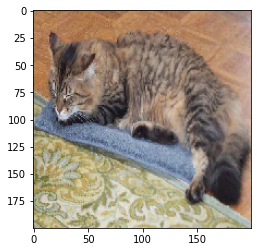

Class  Cat


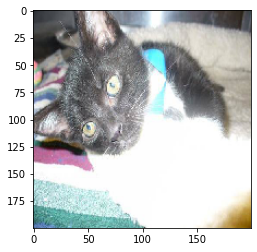

Class  Cat


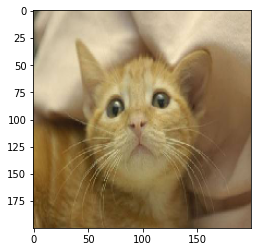

Class  Cat


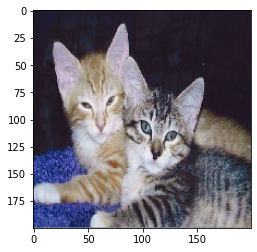

Class  Cat


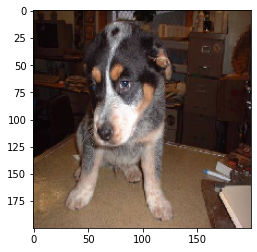

Class  Dog


In [15]:
# Insert your code here to obtain a sample training images batch from the train directory generator
train_image, train_target = next(train_gen)

for i in range(5):
    # Insert your code here to visualize the training images
    visualize_image(train_image[i])
    
    # Insert your code here to print corresponding training label: Cat / Dog
    print("Class ",labels[int(train_target[i])])

    

# Build Model

---
Now build the model as per the best dropout probability value determined earlier. Summarize the model architecture.

---

**2 Points**

---




In [16]:
# Insert your code here to build the CNN model as per the best dropout probability value determined earlier
model = build_cnn_model(dropout_probability = best_prob)

# Insert your code here to print the model summary
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 67712)            

# Training the Model

---
Train the model built with best hyperparameter settings. Generate a **Plot** of Epochs Vs. training and validation accuracy. Also generate a similar plot for training and validation loss. Discuss your **inferences** from the plot.


---

**7 Points**


---



Found 2000 images belonging to 2 classes.
Found 950 images belonging to 2 classes.


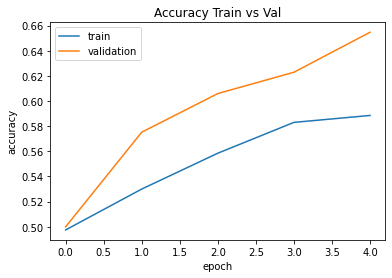

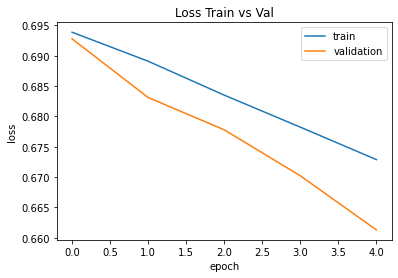

In [29]:
# Insert your code here to train the CNN model with best hyperparameter settings using training set and validate using the validation set (1 Point)
train_generator = get_generator(train_dir_path, best_batch_size)
val_generator = get_generator(validation_dir_path, best_batch_size)

model = build_cnn_model(dropout_probability = best_prob)

# Insert your code here to obtain the lists: epochs, training accuracy, validation accuracy, training loss, validation loss (2 Points)
fitted_model = model.fit_generator(train_generator, steps_per_epoch= total_train_data // best_batch_size, epochs=num_epochs, validation_data=val_generator, validation_steps=total_val_data // best_batch_size, verbose=0)
train_accuracy = fitted_model.history['accuracy']
val_accuracy = fitted_model.history['val_accuracy']

train_loss = fitted_model.history['loss']
val_loss = fitted_model.history['val_loss']

# Insert your code here to plot Epochs Vs. training and validation accuracy (2 Points)
plt.plot(train_accuracy, label='train')
plt.plot(val_accuracy, label='validation')
plt.title('Accuracy Train vs Val')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

# Insert your code here to plot Epochs Vs. training and validation loss (2 Points)
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='validation')
plt.title('Loss Train vs Val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

**OBSERVATIONS AND INFERENCES**

In the above  plots we see the losses decreasing and the accuracies increasing. It seems as if the loss would require more epochs to flatten the loss curve. A test with more epochs has been run next.

## MORE EPOCHS

Found 2000 images belonging to 2 classes.
Found 950 images belonging to 2 classes.


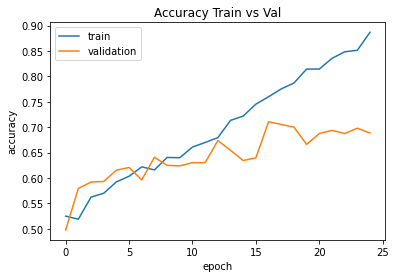

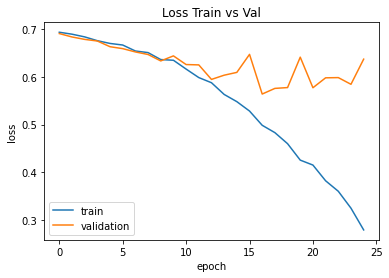

In [45]:
# Insert your code here to train the CNN model with best hyperparameter settings using training set and validate using the validation set (1 Point)
train_generator = get_generator(train_dir_path, best_batch_size)
val_generator = get_generator(validation_dir_path, best_batch_size)

model2 = build_cnn_model(dropout_probability = best_prob)

# NUMBER OF EPOCHS SET TO 25

num_epochs_final = 25

# Insert your code here to obtain the lists: epochs, training accuracy, validation accuracy, training loss, validation loss (2 Points)
fitted_model2 = model2.fit_generator(train_generator, steps_per_epoch= total_train_data // best_batch_size, epochs=num_epochs_final, validation_data=val_generator, validation_steps=total_val_data // best_batch_size, verbose=0)
train_accuracy2 = fitted_model2.history['accuracy']
val_accuracy2 = fitted_model2.history['val_accuracy']

train_loss = fitted_model2.history['loss']
val_loss = fitted_model2.history['val_loss']

# Insert your code here to plot Epochs Vs. training and validation accuracy (2 Points)
plt.plot(train_accuracy2, label='train')
plt.plot(val_accuracy2, label='validation')
plt.title('Accuracy Train vs Val')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

# Insert your code here to plot Epochs Vs. training and validation loss (2 Points)
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='validation')
plt.title('Loss Train vs Val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

**OBSERVATIONS**

As you can see with more epochs we reach a validation accuracy of about 0.7, with the validation loss reaching its minima, after which overfitting takes place. Hence the intuition was correct, more epochs were required.

# Prediction

---
Fetch a sample test batch and determine the model's predictions on this batch of test images. Generate a confusion matrix and comment on the prediction statistics.



---

**Note**: Predictions would return the probability of the image belonging to class 1 (Dog). If this value is more than 0.5, assign class 1 (Dog) as the prediction. Else, assign class 0(Cat) as the prediction.

---
**2 Points**

---





Found 50 images belonging to 2 classes.


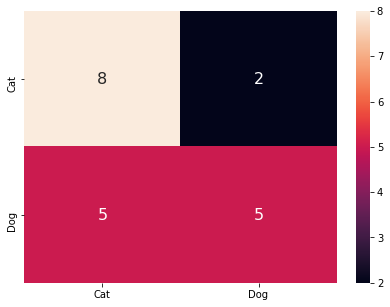

In [41]:
# Insert your code here to obtain a sample test images batch from the test directory generator

# HERE THE MODEL TRAINED FOR 5 EPOCHS ONLY HAS BEEN USED


test_batch_size = 20 # can define any batch size as per the needs
test_gen = get_generator(test_dir_path, test_batch_size)
test_images, test_targets = next(test_gen)
test_targets = test_targets.astype(int)

# Insert your code here to get the model's prediction probabilities
pred = model.predict(test_images, verbose=0)

# Insert your code here to assign class label based on prediction probabilities
pred_labels = np.where(pred>0.5,1,0).reshape(-1)

# Insert your code here to print the confusion matrix.
import seaborn as sn
cm = confusion_matrix(test_targets, pred_labels)
df_cm = pd.DataFrame(cm, index = labels, columns = labels)
plt.figure(figsize = (7,5))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})

Found 50 images belonging to 2 classes.


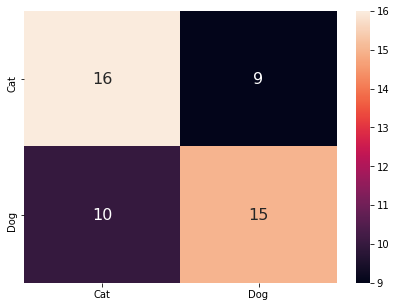

In [37]:
# Insert your code here to obtain a sample test images batch from the test directory generator

# HERE THE MODEL TRAINED FOR 5 EPOCHS ONLY HAS BEEN USED

## FULL TEST SET


test_batch_size = 50 # can define any batch size as per the needs
test_gen = get_generator(test_dir_path, test_batch_size)
test_images, test_targets = next(test_gen)
test_targets = test_targets.astype(int)

# Insert your code here to get the model's prediction probabilities
pred = model.predict(test_images, verbose=0)

# Insert your code here to assign class label based on prediction probabilities
pred_labels = np.where(pred>0.5,1,0).reshape(-1)

# Insert your code here to print the confusion matrix.
import seaborn as sn
cm = confusion_matrix(test_targets, pred_labels)
df_cm = pd.DataFrame(cm, index = labels, columns = labels)
plt.figure(figsize = (7,5))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})

Discuss the **inferences** you obtained from the confusion matrix.


---

**2 Points**


---

For the entire test set the accuracy is 62%. We also see that the model has a slight bias towards predicting cat.

For the random batch the accuracy is about 65% and the cat bias is greater.

